## Decomposition(분해)
+ 하나의 큰 행렬을 여러개의 작은 행렬로 분해하는 것
+ 결과적으로 중요한 정보만 남게 됨

In [246]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [247]:
from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA
from sklearn.decomposition import TruncatedSVD, DictionaryLearning, FactorAnalysis
from sklearn.decomposition import FastICA, NMF, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [248]:
iris, labels = load_iris(return_X_y=True)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)

In [249]:
def plot_iris(iris, labels):
    plt.figure()
    colors = ['blue', 'purple', 'orange']
    for xy, label in zip(iris, labels):
        plt.scatter(xy[0], xy[1], color=colors[label])

In [250]:
def plot_faces(faces):
    plt.figure()
    num_rows, num_cols = 2, 3
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(np.reshape(faces[i], (64,64)), cmap=plt.cm.gray)

(150, 4)


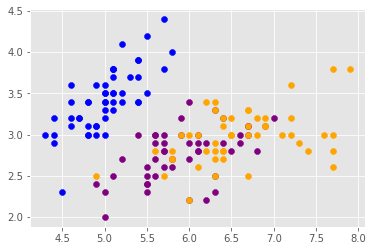

In [251]:
print(iris.shape)
plot_iris(iris[:, :2], labels)

(400, 4096)


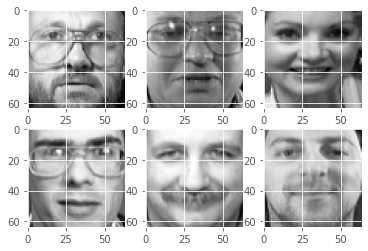

In [252]:
print(faces.shape)
plot_faces(faces)

# 다양한 decomposition 방법들 비교
    + 붓꽃 데이터셋은 n_components=2, random_state=2로 고정
    + 얼굴 데이터셋은 n_components=6, random_state=2로 고정
## PCA(Principal Component Analysis)

(150, 2)


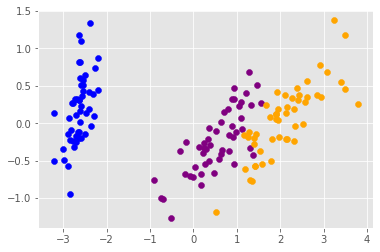

In [253]:
#iris (150, 4) => (150, 2)로 차원축소
model = PCA(n_components=2, random_state=2)
iris_transformed = model.fit_transform(iris)

print(iris_transformed.shape)
plot_iris(iris_transformed, labels)

(6, 4096)


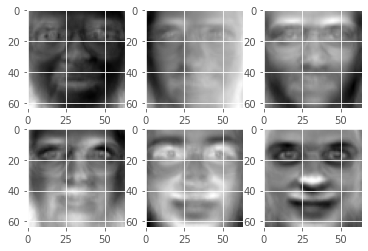

In [254]:
#faces (400, 4096) => (6, 4096)으로 차원축소
model = PCA(n_components=6, random_state=2)
model.fit(faces)
faces_components = model.components_    #얼굴의 주요 특징 6가지

print(faces_components.shape)
plot_faces(faces_components)  #쩜,,, 무섭다,,,

## Incremental PCA
+ PCA는 SVD 알고리즘 실행을 위해 전체 학습데이터셋을 메모리에 올려야 함  
    => Incremental PCA는 학습데이터셋을 미니배치 단위로 나누어 사용  
    => 학습데이터셋이 크거나 온라인으로 PCA 적용할 때 유용

(150, 2)


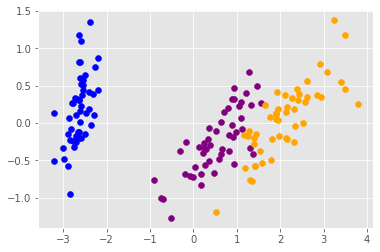

In [255]:
model = IncrementalPCA(n_components=2)
iris_transformed = model.fit_transform(iris)

print(iris_transformed.shape)
plot_iris(iris_transformed, labels)

(6, 4096)


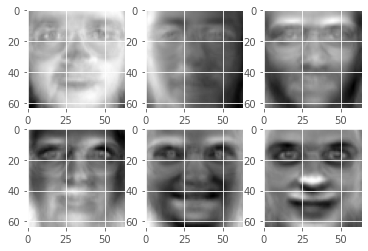

In [256]:
model = IncrementalPCA(n_components=6)
model.fit(faces)
faces_components = model.components_   

print(faces_components.shape)
plot_faces(faces_components)  #쩜,, 더,,, 무섭다,,,

## Kernal PCA
+ 복잡한 비선형 투형을 이용해 차원 축소

(150, 2)


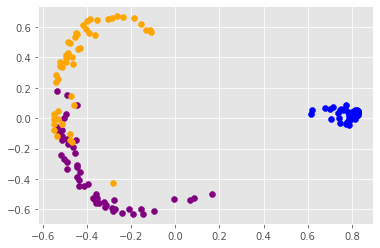

In [257]:
model = KernelPCA(n_components=2, kernel='rbf', random_state=2)
iris_transformed = model.fit_transform(iris)

print(iris_transformed.shape)
plot_iris(iris_transformed, labels)

In [258]:
#model = KernelPCA(n_components=6, kernel='rbf', random_state=2)
#model.fit(faces)
#faces_components = model.components_   

#print(faces_components.shape)   #KernalPCA에서는 이 부분을 구현할 수 없음
#plot_faces(faces_components)  

## Sparse PCA
+ PCA의 주요 단점 중 하나는 주성분들이 보통 모든 입력변수들의 선형결합으로 나타난다는 점  
    => Sparse PCA는 몇개 변수들만의 선형결합으로 주성분을 나타냄으로써 이러한 단점 극복 가능

(150, 2)


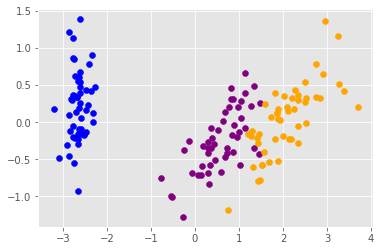

In [259]:
model = SparsePCA(n_components=2, random_state=2)
iris_transformed = model.fit_transform(iris)

print(iris_transformed.shape)
plot_iris(iris_transformed, labels)

(6, 4096)


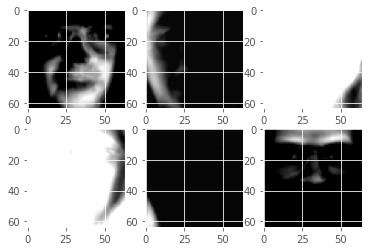

In [260]:
model = SparsePCA(n_components=6, random_state=2)
model.fit(faces)
faces_components = model.components_   

print(faces_components.shape)
plot_faces(faces_components)

## SVD(Singular Value Decomposition)
+ PCA는 정방행렬에 대해서만 행렬분해 가능  
    => SVD는 정방행렬뿐 아니라, 행과 열이 다른 행렬도 분해 가능
+ PCA는 밀집행렬(Dense matrix)에 대해서만 변환 가능  
    => SVD는 밀집행렬, 희소행렬 모두 변환 가능
+ 전체 행렬 크기에 대해 Full SVD를 사용하는 경우는 적음
+ 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD를 주로 사용

(150, 2)


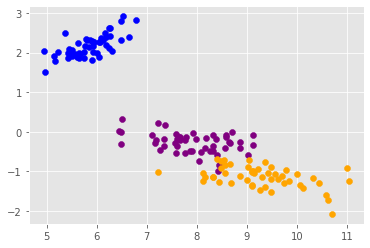

In [261]:
model = TruncatedSVD(n_components=2, random_state=2)
iris_transformed = model.fit_transform(iris)

print(iris_transformed.shape)
plot_iris(iris_transformed, labels)

(6, 4096)


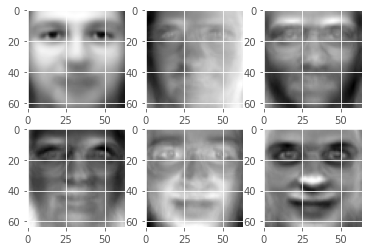

In [262]:
model = TruncatedSVD(n_components=6, random_state=2)
model.fit(faces)
faces_components = model.components_   

print(faces_components.shape)
plot_faces(faces_components)

## (sparse) Dictionary Learning
+ Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전(atom(기저함수)의 집합) 찾기
+ Sparse coding
    + 비지도학습 방법 중 하나
    + over complete 기저벡터(basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발

(150, 2)


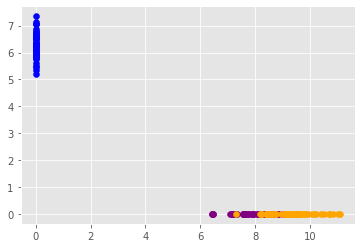

In [263]:
model = DictionaryLearning(n_components=2, random_state=2)
iris_transformed = model.fit_transform(iris)

print(iris_transformed.shape)
plot_iris(iris_transformed, labels)

(6, 4096)


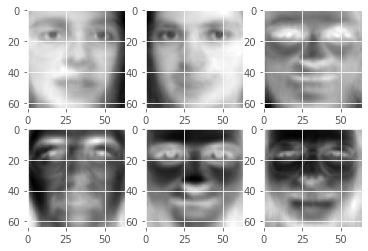

In [264]:
model = DictionaryLearning(n_components=6, random_state=2)
model.fit(faces)
faces_components = model.components_   

print(faces_components.shape)
plot_faces(faces_components)

## Factor Analysis(요인 분석)
+ 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내어, 서로 유사한 변수들끼리 묶어주는 방법
+ PCA는 오차(error)를 고려하지 않았지만, Factor Analysis는 오차(error)를 고려

(150, 2)


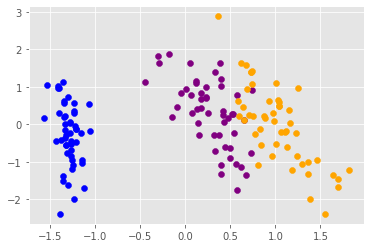

In [265]:
model = FactorAnalysis(n_components=2, random_state=2)
iris_transformed = model.fit_transform(iris)

print(iris_transformed.shape)
plot_iris(iris_transformed, labels)

(6, 4096)


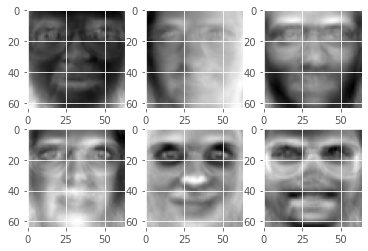

In [266]:
model = FactorAnalysis(n_components=6, random_state=2, max_iter=1000)
model.fit(faces)
faces_components = model.components_   

print(faces_components.shape)
plot_faces(faces_components)

## ICA(Independent Component Analysis, 독립 성분 분석)
+ 다변량의 신호를 통계적으로 독립적인 하부 성분으로 분리하는 계산 방법
+ 주성분을 이용하는 점은 PCA와 비슷하지만, PCA는 데이터를 가장 잘 설명하는 축을 찾고 ICA는 가장 독립적인 축을 찾음

(150, 2)


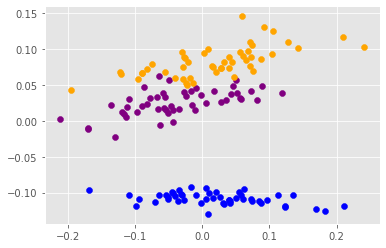

In [267]:
model = FastICA(n_components=2, random_state=2)
iris_transformed = model.fit_transform(iris)

print(iris_transformed.shape)
plot_iris(iris_transformed, labels)

(6, 4096)


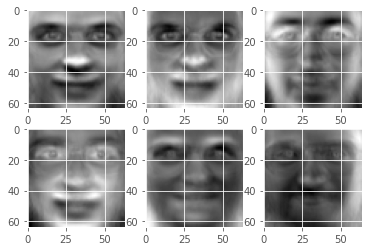

In [268]:
model = FastICA(n_components=6, random_state=2, max_iter=1000)
model.fit(faces)
faces_components = model.components_   

print(faces_components.shape)
plot_faces(faces_components)

## NMF(Non-negative Matrix Factorization,음수 미포함 행렬 분해)
+ 6을 2 * 3으로 분해하듯이, 행렬 V를 행렬 W와 H의 곱으로 분해하는 알고리즘(모두 음수를 포함하지 않은 행렬)

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


(150, 2)


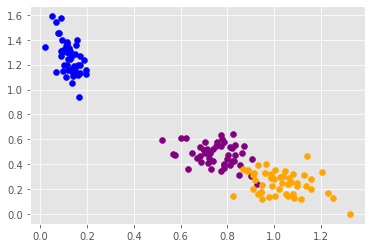

In [269]:
model = NMF(n_components=2, random_state=2, max_iter=1000)
iris_transformed = model.fit_transform(iris)

print(iris_transformed.shape)
plot_iris(iris_transformed, labels)

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


(6, 4096)


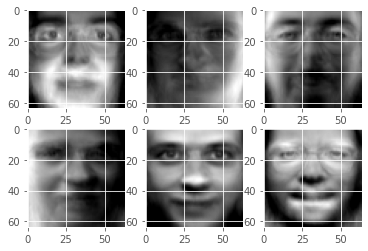

In [270]:
model = NMF(n_components=6, random_state=2, max_iter=1000)
model.fit(faces)
faces_components = model.components_   

print(faces_components.shape)
plot_faces(faces_components)

## Latent Dirichlet Allocation(잠재 디리클레 할당)
+ 이산 자료들에 대한 확률적 생성 모형
+ 잠재적인 의미 구조를 파악할 수 있음

(150, 2)


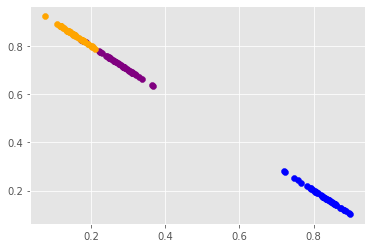

In [271]:
model = LatentDirichletAllocation(n_components=2, random_state=2)
iris_transformed = model.fit_transform(iris)

print(iris_transformed.shape)
plot_iris(iris_transformed, labels)

(6, 4096)


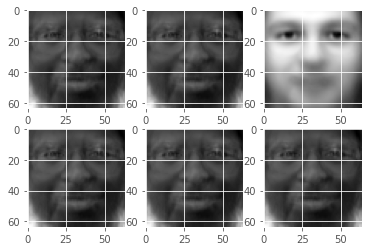

In [272]:
model = LatentDirichletAllocation(n_components=6, random_state=2, max_iter=1000)  #약 28분 소요
model.fit(faces)
faces_components = model.components_   

print(faces_components.shape)
plot_faces(faces_components)
#노이즈가 많이 껴보인다,,

## Linear Discriminant Analysis
+ PCA와 유사하게 입력 데이터셋을 저차원 공간에 투영해 차원 축소
+ 지도학습 분류에서 사용하기 쉽도록 개별 클래스로 분별할 수 있는 기준을 최대한 유지하면서 차원 축소  
    => label을 지정해줘야함  
    => 얼굴 데이터셋은 label이 없으므로 적용 불가

(150, 2)


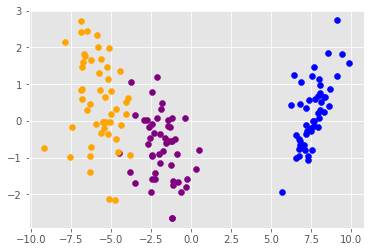

In [273]:
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(iris, labels)
iris_transformed = model.transform(iris)

print(iris_transformed.shape)
plot_iris(iris_transformed, labels)

## Decomposition을 통해 압축된 데이터를 학습에 사용해보기

In [274]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [275]:
def min_max_scale(x):
    min_value, max_value = np.min(x, 0), np.max(x, 0)
    x = (x - min_value) / (max_value - min_value)
    return x

def plot_digits(digits, labels):
    digits = min_max_scale(digits)
    figure = plt.figure(figsize=(20,13))
    ax = plt.subplot(111, projection='3d')
    for i in range(digits.shape[0]):
        ax.text(digits[i, 0], digits[i, 1], digits[i, 2],
                str(labels[i]), color=plt.cm.Set1(labels[i]/10.),
                    fontdict={'weight':'bold', 'size':10})
    ax.view_init(4, -72)

In [276]:
#NMF를 이용해 손글씨 데이터셋 차원 축소
digits = load_digits()

nmf = NMF(n_components=3)
digits_decomposed = nmf.fit_transform(digits.data)

print(f'축소 전 : {digits.data.shape}')
print(f'축소 후 : {digits_decomposed.shape}')

축소 전 : (1797, 64)
축소 후 : (1797, 3)


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


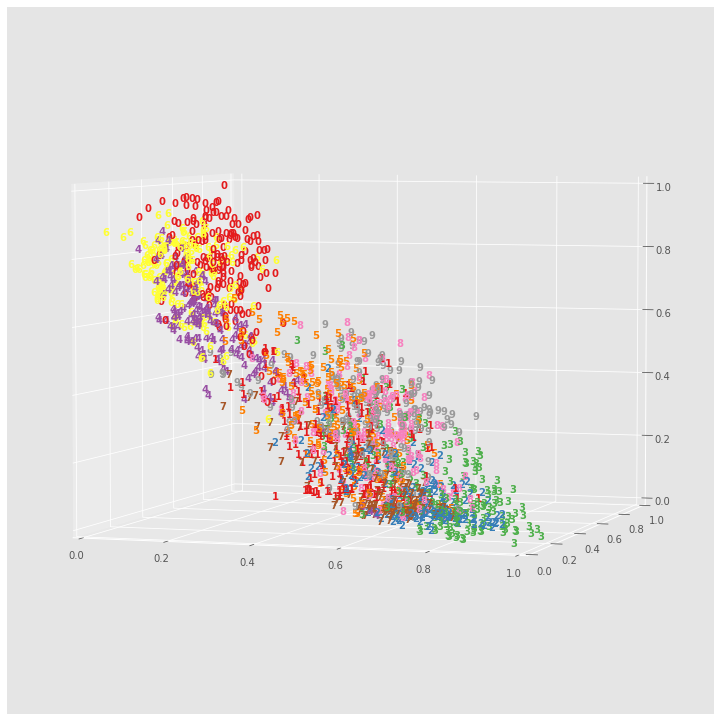

In [277]:
plot_digits(digits_decomposed, digits.target)

In [278]:
#축소한 데이터셋을 KNN 모델에 입력
knn = KNeighborsClassifier()

score = cross_val_score(estimator=knn,
                        X=digits.data, y=digits.target,
                        cv=10)
score_decomposed = cross_val_score(estimator=knn,
                                   X=digits_decomposed, y=digits.target,
                                   cv=10)

print(f'축소 전 cv score : {score.mean()} +- {score.std()}')
print(f'축소 후 cv score : {score_decomposed.mean()} +- {score_decomposed.std()}')

축소 전 cv score : 0.9710738671632526 +- 0.01716903805698193
축소 후 cv score : 0.5942613283674735 +- 0.05347413193799746


In [279]:
#축소한 데이터셋을 SVC 모델에 입력
svc = SVC()

score = cross_val_score(estimator=svc,
                        X=digits.data, y=digits.target,
                        cv=10)
score_decomposed = cross_val_score(estimator=svc,
                                   X=digits_decomposed, y=digits.target,
                                   cv=10)

print(f'축소 전 cv score : {score.mean()} +- {score.std()}')
print(f'축소 후 cv score : {score_decomposed.mean()} +- {score_decomposed.std()}')

축소 전 cv score : 0.9699503414028554 +- 0.021423935130151475
축소 후 cv score : 0.6326815642458101 +- 0.03783202945519219


In [280]:
#축소한 데이터셋을 Decision Tree 모델에 입력
dt = DecisionTreeClassifier()

score = cross_val_score(estimator=dt,
                        X=digits.data, y=digits.target,
                        cv=10)
score_decomposed = cross_val_score(estimator=dt,
                                   X=digits_decomposed, y=digits.target,
                                   cv=10)

print(f'축소 전 cv score : {score.mean()} +- {score.std()}')
print(f'축소 후 cv score : {score_decomposed.mean()} +- {score_decomposed.std()}')

축소 전 cv score : 0.820782122905028 +- 0.041275306842348806
축소 후 cv score : 0.5581222842954687 +- 0.04153903214626401


In [281]:
#축소한 데이터셋을 Random Forest 모델에 입력
rf = RandomForestClassifier()

score = cross_val_score(estimator=rf,
                        X=digits.data, y=digits.target,
                        cv=10)
score_decomposed = cross_val_score(estimator=rf,
                                   X=digits_decomposed, y=digits.target,
                                   cv=10)

print(f'축소 전 cv score : {score.mean()} +- {score.std()}')
print(f'축소 후 cv score : {score_decomposed.mean()} +- {score_decomposed.std()}')

축소 전 cv score : 0.9454655493482308 +- 0.0291756324287906
축소 후 cv score : 0.608699565487275 +- 0.05650843545993946


### 분해 후 복원된 데이터를 사용해 학습해보기

In [282]:
nmf = NMF(n_components=3)
digits_decomposed = nmf.fit_transform(digits.data)
components = nmf.components_

digits_decomposed.shape, nmf.components_.shape

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


((1797, 3), (3, 64))

In [283]:
digits_reconstructed = digits_decomposed @ components    # @을 이용해 행렬곱

print(f'복원 전 : {digits_decomposed.shape}')
print(f'복원 후 : {digits_reconstructed.shape}')

복원 전 : (1797, 3)
복원 후 : (1797, 64)


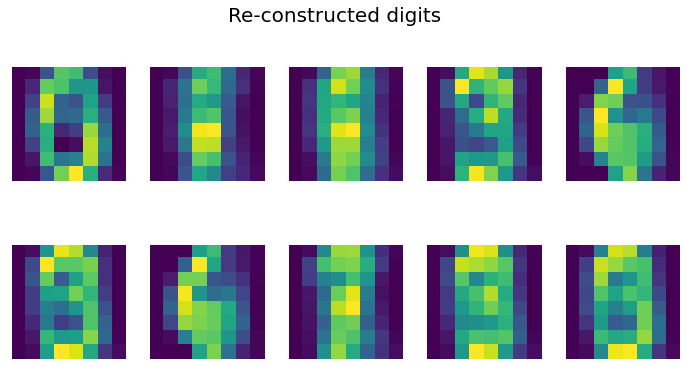

In [284]:
plt.figure(figsize=(12,6))
plt.suptitle('Re-constructed digits', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(digits_reconstructed[i].reshape(8,8))

In [285]:
#복원한 데이터셋을 KNN 모델에 입력
knn = KNeighborsClassifier()

score = cross_val_score(estimator=knn,
                        X=digits.data, y=digits.target,
                        cv=10)
score_decomposed = cross_val_score(estimator=knn,
                                   X=digits_decomposed, y=digits.target,
                                   cv=10)
score_reconstructed = cross_val_score(estimator=knn,
                                      X=digits_reconstructed, y=digits.target,
                                      cv=10)

print(f'축소 전 cv score : {score.mean()} +- {score.std()}')
print(f'축소 후 cv score : {score_decomposed.mean()} +- {score_decomposed.std()}')
print(f'복원 후 cv score : {score_reconstructed.mean()} +- {score_reconstructed.std()}')

축소 전 cv score : 0.9710738671632526 +- 0.01716903805698193
축소 후 cv score : 0.5942613283674735 +- 0.05347413193799746
복원 후 cv score : 0.6054096834264431 +- 0.04473772015961547


In [286]:
#복원한 데이터셋을 SVC 모델에 입력
svc = SVC()

score = cross_val_score(estimator=svc,
                        X=digits.data, y=digits.target,
                        cv=10)
score_decomposed = cross_val_score(estimator=svc,
                                   X=digits_decomposed, y=digits.target,
                                   cv=10)
score_reconstructed = cross_val_score(estimator=svc,
                                      X=digits_reconstructed, y=digits.target,
                                      cv=10)

print(f'축소 전 cv score : {score.mean()} +- {score.std()}')
print(f'축소 후 cv score : {score_decomposed.mean()} +- {score_decomposed.std()}')
print(f'복원 후 cv score : {score_reconstructed.mean()} +- {score_reconstructed.std()}')

축소 전 cv score : 0.9699503414028554 +- 0.021423935130151475
축소 후 cv score : 0.6326815642458101 +- 0.03783202945519219
복원 후 cv score : 0.6310055865921788 +- 0.03615972266324936


In [287]:
#복원한 데이터셋을 Decision Tree 모델에 입력
dt = DecisionTreeClassifier()

score = cross_val_score(estimator=dt,
                        X=digits.data, y=digits.target,
                        cv=10)
score_decomposed = cross_val_score(estimator=dt,
                                   X=digits_decomposed, y=digits.target,
                                   cv=10)
score_reconstructed = cross_val_score(estimator=dt,
                                      X=digits_reconstructed, y=digits.target,
                                      cv=10)

print(f'축소 전 cv score : {score.mean()} +- {score.std()}')
print(f'축소 후 cv score : {score_decomposed.mean()} +- {score_decomposed.std()}')
print(f'복원 후 cv score : {score_reconstructed.mean()} +- {score_reconstructed.std()}')

축소 전 cv score : 0.8168901303538176 +- 0.031540728561867674
축소 후 cv score : 0.5519987585350714 +- 0.04149564535392859
복원 후 cv score : 0.534177529484792 +- 0.04319162423814569


In [288]:
#복원한 데이터셋을 Random Forest 모델에 입력
rf = RandomForestClassifier()

score = cross_val_score(estimator=rf,
                        X=digits.data, y=digits.target,
                        cv=10)
score_decomposed = cross_val_score(estimator=rf,
                                   X=digits_decomposed, y=digits.target,
                                   cv=10)
score_reconstructed = cross_val_score(estimator=rf,
                                      X=digits_reconstructed, y=digits.target,
                                      cv=10)

print(f'축소 전 cv score : {score.mean()} +- {score.std()}')
print(f'축소 후 cv score : {score_decomposed.mean()} +- {score_decomposed.std()}')
print(f'복원 후 cv score : {score_reconstructed.mean()} +- {score_reconstructed.std()}')

축소 전 cv score : 0.9476753569211669 +- 0.022595725149085734
축소 후 cv score : 0.6098137802607076 +- 0.053547159260215804
복원 후 cv score : 0.6098355058969585 +- 0.057908444738626996


## 이미지 복원
+ 훈련 데이터셋으로 NMF 모델을 훈련시켜 얼굴의 중요특성(n_components)을 추출
+ 시험 데이터셋에 일부러 damage 유발  
    => 손상된 시험 데이터셋에 model.components_를 행렬곱하여 시험 데이터셋을 복원

In [289]:
from sklearn.model_selection import train_test_split

train_faces, test_faces = train_test_split(faces, test_size=0.1, random_state=2)

train_faces.shape, test_faces.shape

((360, 4096), (40, 4096))

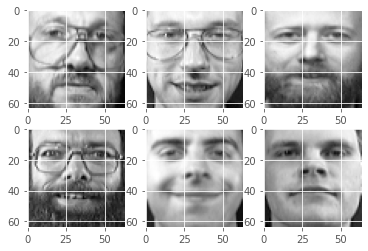

In [290]:
plot_faces(train_faces)  

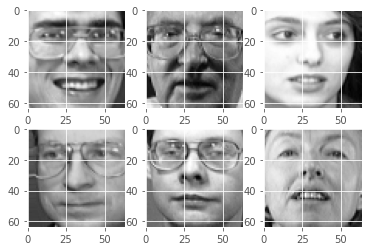

In [291]:
plot_faces(test_faces) 

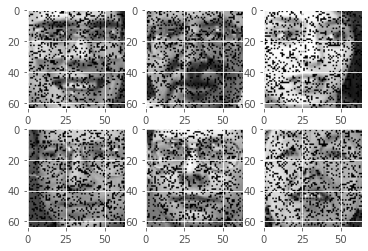

In [292]:
#테스트 데이터셋에 랜덤으로 대미지 입히기 
damaged_test_faces = []
for face in test_faces:
    idx = np.random.choice(range(64*64), size=1024)
    damaged_face = face.copy()
    damaged_face[idx] = 0.     #랜덤한 위치의 값을 0으로 바꿈
    damaged_test_faces.append(damaged_face)

# 'H should have the same dtype as X. Got H.dtype = float32.' 에러 방지
damaged_test_faces = np.asarray(damaged_test_faces, dtype=np.float32)   

plot_faces(damaged_test_faces)

### n_components가 10, 100, 300일 때 비교

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


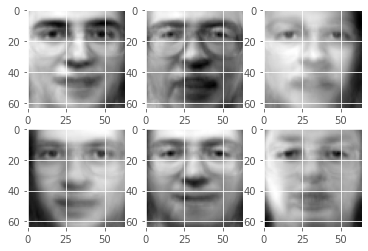

In [293]:
nmf = NMF(n_components=10, random_state=2, max_iter=1000)
nmf.fit(train_faces)

matrix1 = nmf.transform(damaged_test_faces)   #(40, 10)
matrix2 = nmf.components_                     #(10, 4096)

plot_faces(matrix1 @ matrix2)
#NMF를 이용해 차원축소 한 후 NMF의 components와 행렬곱 해주었더니 대미지가 사라짐

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


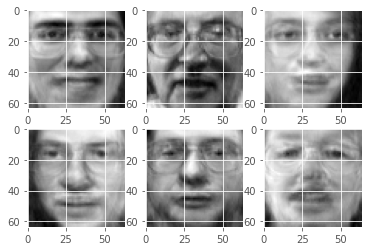

In [294]:
nmf = NMF(n_components=100, random_state=2, max_iter=1000)
nmf.fit(train_faces)

matrix1 = nmf.transform(damaged_test_faces)
matrix2 = nmf.components_
plot_faces(matrix1 @ matrix2)
#components를 늘렸더니 더 선명해짐

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


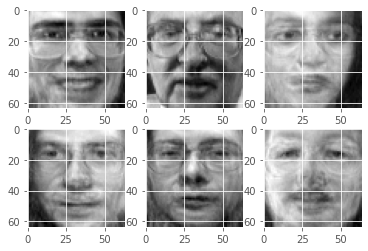

In [295]:
nmf = NMF(n_components=300, random_state=2, max_iter=1000)
nmf.fit(train_faces)

matrix1 = nmf.transform(damaged_test_faces)
matrix2 = nmf.components_
plot_faces(matrix1 @ matrix2)
#더더 선명해짐!

## decomposition 방법별 분해 후 복원
+ n_components=6으로 고정

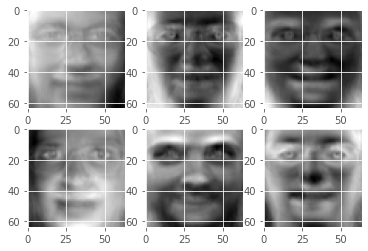

In [303]:
model = PCA(n_components=6, random_state=2)

matrix1 = model.fit_transform(faces)       #faces(400,4096) => (400, 10)
matrix2 = model.components_                #얼굴의 주요 특성 10가지에 대한 데이터(10, 4096)
faces_reconstructed = matrix1 @ matrix2

plot_faces(faces_reconstructed)

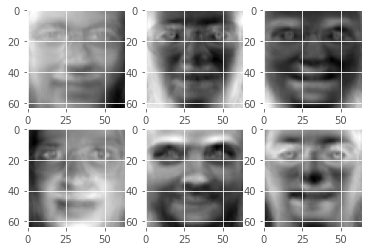

In [304]:
model = IncrementalPCA(n_components=6)

matrix1 = model.fit_transform(faces)       
matrix2 = model.components_                
faces_reconstructed = matrix1 @ matrix2

plot_faces(faces_reconstructed)

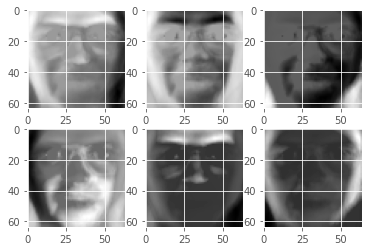

In [305]:
model = SparsePCA(n_components=6, random_state=2)

matrix1 = model.fit_transform(faces)       
matrix2 = model.components_                
faces_reconstructed = matrix1 @ matrix2

plot_faces(faces_reconstructed)

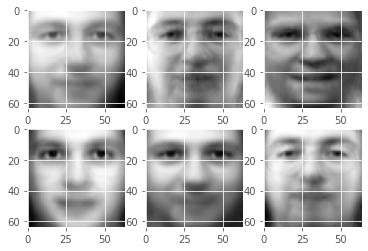

In [307]:
model = TruncatedSVD(n_components=6, random_state=2)

matrix1 = model.fit_transform(faces)       
matrix2 = model.components_                
faces_reconstructed = matrix1 @ matrix2

plot_faces(faces_reconstructed)

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_dict_learning.py:207: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


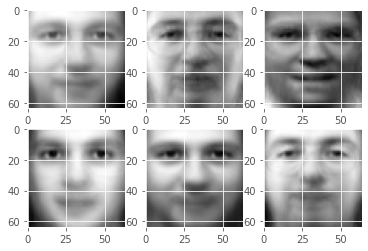

In [309]:
model = DictionaryLearning(n_components=6, random_state=2)

matrix1 = model.fit_transform(faces)       
matrix2 = model.components_                
faces_reconstructed = matrix1 @ matrix2

plot_faces(faces_reconstructed)

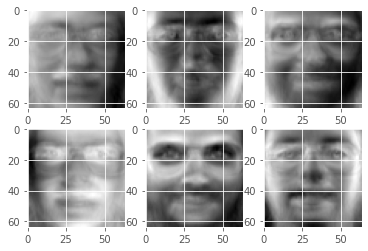

In [310]:
model = FactorAnalysis(n_components=6, random_state=2)

matrix1 = model.fit_transform(faces)       
matrix2 = model.components_                
faces_reconstructed = matrix1 @ matrix2

plot_faces(faces_reconstructed)

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


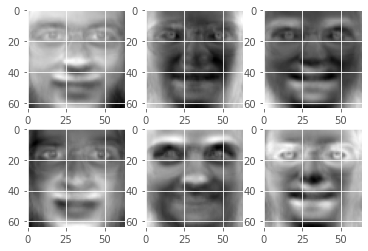

In [311]:
model = FastICA(n_components=6, random_state=2)

matrix1 = model.fit_transform(faces)       
matrix2 = model.components_                
faces_reconstructed = matrix1 @ matrix2

plot_faces(faces_reconstructed)

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


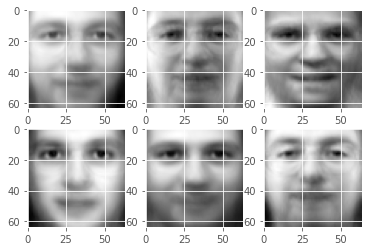

In [312]:
model = NMF(n_components=6, random_state=2)

matrix1 = model.fit_transform(faces)       
matrix2 = model.components_                
faces_reconstructed = matrix1 @ matrix2

plot_faces(faces_reconstructed)

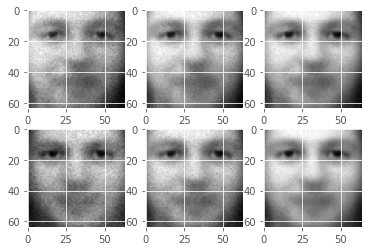

In [313]:
model = LatentDirichletAllocation(n_components=6, random_state=2)

matrix1 = model.fit_transform(faces)       
matrix2 = model.components_                
faces_reconstructed = matrix1 @ matrix2

plot_faces(faces_reconstructed)